<a href="https://colab.research.google.com/github/raspopovaa/Pet-Project-Data-Analyst/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D0%B5%D1%80%D1%81%D0%BF%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B3%D0%BE_%D1%82%D0%B0%D1%80%D0%B8%D1%84%D0%B0_%D0%B4%D0%BB%D1%8F_%D1%82%D0%B5%D0%BB%D0%B5%D0%BA%D0%BE%D0%BC-%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B8/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D0%B5%D1%80%D1%81%D0%BF%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B3%D0%BE_%D1%82%D0%B0%D1%80%D0%B8%D1%84%D0%B0_%D0%B4%D0%BB%D1%8F_%D1%82%D0%B5%D0%BB%D0%B5%D0%BA%D0%BE%D0%BC_%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение перспективного тарифа для телеком компании

Коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from scipy import stats as st
import datetime
df_c= pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
df_m= pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
df_t= pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
df_i= pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
df_u= pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 40
import warnings
warnings.filterwarnings('ignore')

Импортируем данные. Рассмотрим полцученные таблице поближе.

In [2]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


df_c - таблица с данными о звонках клиентов. К данным замечаний нет, но дату call_date, нужно перевести в тип дата.

In [3]:
df_t.rename(columns={'tariff_name': 'tariff'}, inplace=True)
df_t

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


df_t - таблица с данными о тарифах smart и ultra. К данным замечаний нет, но изменим название столбца tariff_name на tariff.

In [4]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


df_m - таблица с данными о сообщениях клиентов. К данным замечаний нет, но дату message_date, нужно перевести в тип дата.

In [5]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


df_i - таблица с данными об интернет трафике клиентов. К данным замечаний нет, но дату session_date, нужно перевести в тип дата. 

In [6]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


df_u - таблица с данными о клиентах из выбоки. Есть пропуски в столбце churn_date, так же столбец reg_date, нужно перевести в тип дата. 

## 1.1 Вывод
Мы имеем 5 таблиц с данными о звонка, сообщениях, интернет траифке клиентов. Также информацию о тарифах и самих клиентах из выбоки. Столбцы в таблицах имеют разный тип данных. Таблица удобная для анализа данных - в каждом столбце хранятся значения, каждая строка содержит одно наблюдение, к которому привязаны значения разных переменных. Название столбцов без пробелов, несколько слов разделяются нижним подчеркиванием, на одном языке и в одном регистре, отображают в краткой форме какого рода информация содержится в каждом столбце. В таблицах df_с, df_m, df_i есть стоблцы тип данных которых нужно изменить на дату. В таблице df_u есть пропуски в стобце churn_date которые можно заменить на 0, в стобце reg_date, также нужно изменить тпи данных на дату. Приступаем к подготовке данных для анализа.

## Шаг 2. Подготовьте данные

Рассмотрим датасет df_c. Нам нужно изменить тип данных столбца call_date. Определить номер месяца свонков. Также добавим название тарифа в таблицу. Для этого соединим датасеты user и df_c.

In [7]:
user= df_u[['user_id', 'tariff']]

In [8]:
df_c['call_date'] = pd.to_datetime(df_c['call_date'], format = '%Y-%m-%d')
df_c['date_month'] = pd.DatetimeIndex(df_c['call_date']).month
df_c['duration']= np.ceil(df_c['duration']) # Округлил значения в большую сторону
df_c = df_c.query('duration != 0') #Убрали 0
df_c1 = df_c.merge(user, on = 'user_id', how = 'inner')
df_c1


,id,call_date,duration,user_id,date_month,tariff
0,1000_2,2018-06-11,3.00,1000,6,ultra
1,1000_3,2018-09-21,14.00,1000,9,ultra
2,1000_4,2018-12-15,6.00,1000,12,ultra
3,1000_7,2018-08-22,19.00,1000,8,ultra
4,1000_8,2018-09-15,19.00,1000,9,ultra
...,...,...,...,...,...,...
162989,1499_215,2018-12-26,1.00,1499,12,smart
162990,1499_216,2018-10-18,19.00,1499,10,smart
162991,1499_217,2018-11-10,11.00,1499,11,smart
162992,1499_218,2018-10-06,5.00,1499,10,smart


Привели таблицу к нужному виду. Теперь найдем количество звонков и раходы каждого клиента на эти звонки помесячно.

<div class="alert alert-info">
    
Звонки и интеренет трафик округлил используя np.ceil().Ноль в звонках и интернет трафике может повлиять на их среднее значение, поэтому удлим их.

In [9]:
df_c_rev = df_c1.groupby(['tariff', 'user_id','date_month'])['duration'].agg(['sum', 'count']).reset_index()
df_c_rev

,tariff,user_id,date_month,sum,count
0,smart,1001,11,430.00,45
1,smart,1001,12,414.00,47
2,smart,1002,6,117.00,14
3,smart,1002,7,214.00,21
4,smart,1002,8,289.00,37
...,...,...,...,...,...
3163,ultra,1495,8,92.00,13
3164,ultra,1495,9,813.00,95
3165,ultra,1495,10,"1,030.00",126
3166,ultra,1495,11,954.00,112


Используя метод groupby() мы получили нужные данные. Для вычисления выручки создадим функцию revenue_call, которая вычислит выручку по клиенту который вышел за пределы своего лимита. Если  клиент не превысил лимит установим значение 0, абонентскую плату в соответствии с тарифом прибавим при подсчете общей выручки с клиента.

In [10]:
def revenue_call (row):
  tariff = row['tariff']
  sum = row['sum']
  if tariff == 'smart':
    x = sum - 500
    y = ((x*x)**(1/2)+x)/2 #При любом отрицательном X формула вернет "ноль", при любом положительном X формула вернет тот же самый X.
    z = y * 3
    return z
  elif tariff == 'ultra':
    x = sum - 3000
    y = ((x*x)**(1/2)+x)/2 #При любом отрицательном X формула вернет "ноль", при любом положительном X формула вернет тот же самый X.
    z = y * 1
    return z
  else:
    return 'нужно проверить'



In [11]:
df_c_rev['revenue_call'] = df_c_rev.apply(revenue_call, axis=1)
df_c_rev.sample(15)

,tariff,user_id,date_month,sum,count,revenue_call
1254,smart,1275,4,120.00,13,0.00
1350,smart,1296,8,226.00,27,0.00
1850,smart,1421,5,282.00,31,0.00
2287,ultra,1048,12,688.00,81,0.00
2264,ultra,1021,7,"1,197.00",125,0.00
2634,ultra,1255,3,256.00,27,0.00
1249,smart,1274,8,709.00,76,627.00
390,smart,1082,12,267.00,27,0.00
111,smart,1025,5,552.00,59,156.00
1982,smart,1447,9,436.00,50,0.00


В столбце revenue_call вы вычислили выручку от звонков по каждому клиенту помесячно. Аналогично посчитаем выручку от сообщений.

Таблица df_m, приводи столбец message_date к типу данных дата. Определим номер месяца отправки сообщений. По аналогии со звонками сгруппируем данные по сообщениям.

In [12]:
df_m['message_date'] = pd.to_datetime(df_m['message_date'], format = '%Y-%m-%d')
df_m['date_month'] = pd.DatetimeIndex(df_m['message_date']).month
df_m1 = df_m.merge(user, on = 'user_id', how = 'inner')
df_m1

df_m_rev = df_m1.groupby(['tariff', 'user_id','date_month'])['id'].agg(['count']).reset_index()
df_m_rev

,tariff,user_id,date_month,count
0,smart,1002,6,4
1,smart,1002,7,11
2,smart,1002,8,13
3,smart,1002,9,4
4,smart,1002,10,10
...,...,...,...,...
2712,ultra,1495,8,13
2713,ultra,1495,9,82
2714,ultra,1495,10,82
2715,ultra,1495,11,79


Так же создадим функцию revenue_mess, для определения вырчки от отправки сообщений клиентами.

In [13]:

def revenue_mess (row):
  tariff = row['tariff']
  count = row['count']
  if tariff == 'smart':
    x = count - 50
    y = ((x*x)**(1/2)+x)/2 #При любом отрицательном X формула вернет "ноль", при любом положительном X формула вернет тот же самый X.
    z = y * 3
    return z
  elif tariff == 'ultra':
    x = count - 1000
    y = ((x*x)**(1/2)+x)/2 #При любом отрицательном X формула вернет "ноль", при любом положительном X формула вернет тот же самый X.
    z = y * 1
    return z
  else:
    return 'нужно проверить'

In [14]:
df_m_rev['revenue_mess'] = df_m_rev.apply(revenue_mess, axis=1)
df_m_rev.sample(15)


,tariff,user_id,date_month,count,revenue_mess
1048,smart,1268,11,49,0.00
1414,smart,1373,12,55,15.00
2364,ultra,1330,10,84,0.00
1870,smart,1486,12,83,99.00
323,smart,1073,10,34,0.00
2162,ultra,1180,8,10,0.00
1652,smart,1432,9,64,42.00
2258,ultra,1271,10,98,0.00
1914,smart,1498,7,20,0.00
300,smart,1070,9,8,0.00


В столбце revenue_mess вы вычислили выручку от звонков по каждому клиенту помесячно. Аналогично посчитаем выручку от трафика интернета.

Таблица df_i. Столбец session_date приведем к типу данных дата. Сгруппируем данные для расчета выручки.

In [15]:
df_i['session_date'] = pd.to_datetime(df_i['session_date'], format = '%Y-%m-%d')
df_i['date_month'] = pd.DatetimeIndex(df_i['session_date']).month
df_i['mb_used']= np.ceil(df_i['mb_used']) #Округлил значение МБ в большую сторону.
df_i = df_i.query('mb_used != 0') #Убрали 0
df_i1 = df_i.merge(user, on = 'user_id', how = 'inner')

df_i1

df_i_rev = df_i1.groupby(['tariff', 'user_id','date_month'])['mb_used'].agg(['sum']).reset_index()
df_i_rev


,tariff,user_id,date_month,sum
0,smart,1001,11,"18,452.00"
1,smart,1001,12,"14,053.00"
2,smart,1002,6,"10,871.00"
3,smart,1002,7,"17,601.00"
4,smart,1002,8,"20,347.00"
...,...,...,...,...
3196,ultra,1495,8,"2,616.00"
3197,ultra,1495,9,"33,105.00"
3198,ultra,1495,10,"29,393.00"
3199,ultra,1495,11,"38,972.00"


Создадим функцию revenue_net для вычисления выручки.

In [16]:

def revenue_net (row):
  tariff = row['tariff']
  sum = row['sum']
  if tariff == 'smart':
    x = sum - 15360
    y = ((x*x)**(1/2)+x)/2 #При любом отрицательном X формула вернет "ноль", при любом положительном X формула вернет тот же самый X.
    z = round(y / 1024 )* 200
    return z
  elif tariff == 'ultra':
    x = sum - 30720
    y = ((x*x)**(1/2)+x)/2 #При любом отрицательном X формула вернет "ноль", при любом положительном X формула вернет тот же самый X.
    z = round(y / 1024 )* 150
    return z
  else:
    return 'нужно проверить'

In [17]:
df_i_rev['revenue_net'] = df_i_rev.apply(revenue_net, axis=1)
df_i_rev.sample(15)

,tariff,user_id,date_month,sum,revenue_net
293,smart,1062,12,"4,520.00",0
110,smart,1025,4,"10,461.00",0
1002,smart,1216,11,"5,059.00",0
755,smart,1164,8,"11,441.00",0
2099,smart,1475,9,"14,778.00",0
1655,smart,1373,12,"23,856.00",1600
1546,smart,1340,2,"16,842.00",200
947,smart,1204,6,"19,822.00",800
3089,ultra,1440,10,"20,428.00",0
1711,smart,1389,10,"18,683.00",600


В столбце revenue_net вы вычислили выручку от интернет трафика по каждому клиенту помесячно. Теперь мы модем вычислить общую выручки по каждому клиенту помесячно.

Для расчета объединим таблицы df_c_rev, df_m_revб df_i_rev

In [18]:
revenue_user1 = pd.merge(df_c_rev, df_m_rev, how='outer', on=['user_id', 'date_month'], 
         sort=True,
         suffixes=('_c', '_m'))
pd.DataFrame(round((revenue_user1.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
tariff_c,1.370000
user_id,0.000000
date_month,0.000000
sum,1.370000
count_c,1.370000
revenue_call,1.370000
tariff_m,15.410000
count_m,15.410000
revenue_mess,15.410000


In [19]:
revenue_user1.head(15)

,tariff_c,user_id,date_month,sum,count_c,revenue_call,tariff_m,count_m,revenue_mess
0,ultra,1000,5,159.00,17.00,0.00,ultra,22.00,0.00
1,ultra,1000,6,172.00,28.00,0.00,ultra,60.00,0.00
2,ultra,1000,7,340.00,41.00,0.00,ultra,75.00,0.00
3,ultra,1000,8,408.00,42.00,0.00,ultra,81.00,0.00
4,ultra,1000,9,466.00,46.00,0.00,ultra,57.00,0.00
5,ultra,1000,10,350.00,44.00,0.00,ultra,73.00,0.00
6,ultra,1000,11,338.00,37.00,0.00,ultra,58.00,0.00
7,ultra,1000,12,333.00,38.00,0.00,ultra,70.00,0.00
8,smart,1001,11,430.00,45.00,0.00,NaN,NaN,NaN
9,smart,1001,12,414.00,47.00,0.00,NaN,NaN,NaN


15 % пропусков это серьёзно. Посмтрев на данные таблицы можно сделать вывод, что NaN появился потому что, сообщений в данный месяц просто не отправлялось. Поэтому мы можем смело заменить NaN на 0. Так же удалим столбец tariff_m. Так как он дублируют информацию в столбце tariff_c. Так же продолжим объединение таблиц.

In [20]:
revenue_user2 = pd.merge(revenue_user1, df_i_rev, how='outer', on=['user_id', 'date_month'], 
         left_index=False, right_index=False, sort=True,
         suffixes=('_i'))
df_ut = df_u.loc[:,['user_id', 'tariff']]
revenue_user = pd.merge(revenue_user2, df_ut, how='inner', on=['user_id'])
revenue_user.drop(['tariff_c', 'tariff_m', 'tariff_x' ], axis=1, inplace=True)
revenue_user = revenue_user.fillna(0)
revenue_user

,user_id,date_month,sum_,count_c,revenue_call,count_m,revenue_mess,sumi,revenue_net,tariff_y
0,1000,5,159.00,17.00,0.00,22.00,0.00,"2,256.00",0.00,ultra
1,1000,6,172.00,28.00,0.00,60.00,0.00,"23,257.00",0.00,ultra
2,1000,7,340.00,41.00,0.00,75.00,0.00,"14,016.00",0.00,ultra
3,1000,8,408.00,42.00,0.00,81.00,0.00,"14,070.00",0.00,ultra
4,1000,9,466.00,46.00,0.00,57.00,0.00,"14,581.00",0.00,ultra
...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.00,30.00,0.00,42.00,0.00,"20,604.00","1,000.00",smart
3210,1499,9,70.00,8.00,0.00,11.00,0.00,"1,848.00",0.00,smart
3211,1499,10,449.00,44.00,0.00,48.00,0.00,"17,809.00",400.00,smart
3212,1499,11,612.00,62.00,336.00,59.00,27.00,"17,984.00",600.00,smart


Создадим функцию revenue_u, для вычисления общей выручки по каждому клиенту помесячно.

In [21]:
def revenue_u (row):
    
    
    tariff = row['tariff_y']
    revenue_call = row['revenue_call']
    revenue_mess = row['revenue_mess']
    revenue_net = row['revenue_net']
    user_id = row['user_id']
    if tariff == 'smart':
        z =revenue_call + revenue_mess + revenue_net + 550
        return z
    elif tariff == 'ultra':
        z =revenue_call + revenue_mess + revenue_net + 1950
        return z
    else:
        return 'нужно проверить'

  

In [22]:
revenue_user['revenue_users'] = revenue_user.apply(revenue_u, axis=1)
revenue_user

,user_id,date_month,sum_,count_c,revenue_call,count_m,revenue_mess,sumi,revenue_net,tariff_y,revenue_users
0,1000,5,159.00,17.00,0.00,22.00,0.00,"2,256.00",0.00,ultra,"1,950.00"
1,1000,6,172.00,28.00,0.00,60.00,0.00,"23,257.00",0.00,ultra,"1,950.00"
2,1000,7,340.00,41.00,0.00,75.00,0.00,"14,016.00",0.00,ultra,"1,950.00"
3,1000,8,408.00,42.00,0.00,81.00,0.00,"14,070.00",0.00,ultra,"1,950.00"
4,1000,9,466.00,46.00,0.00,57.00,0.00,"14,581.00",0.00,ultra,"1,950.00"
...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,247.00,30.00,0.00,42.00,0.00,"20,604.00","1,000.00",smart,"1,550.00"
3210,1499,9,70.00,8.00,0.00,11.00,0.00,"1,848.00",0.00,smart,550.00
3211,1499,10,449.00,44.00,0.00,48.00,0.00,"17,809.00",400.00,smart,950.00
3212,1499,11,612.00,62.00,336.00,59.00,27.00,"17,984.00",600.00,smart,"1,513.00"


<div class="alert alert-info">
Подтянул данные из таблицы df_u. Выручку посчитал.

## 2.1 Вывод
Мы подготовили наши даннве к анализу. Изменили типы данных. Сгруппировали таблицы. Объединили их в одну общую. При объединении данных были выялены пропуски данных. Мы их заполнили, где позволяла ситуция удалили. Так же вычислили необходимые параметры для анализа. 

## Шаг 3. Проанализируйте данные

Создадим выборки клиентов в зависимости от тарифа по звонкам, сообщениям и трафику интернета.

In [23]:

sam_call_smart = df_c_rev.query('tariff == "smart"')
sam_call_ultra = df_c_rev.query('tariff == "ultra"')
sam_mess_smart = df_m_rev.query('tariff == "smart"')
sam_mess_ultra = df_m_rev.query('tariff == "ultra"')
sam_net_smart = df_i_rev.query('tariff == "smart"')
sam_net_ultra = df_i_rev.query('tariff == "ultra"')
sam_net_smart['sum'] = sam_net_smart['sum']/1024
sam_net_ultra['sum'] = sam_net_ultra['sum']/1024

Создадим функцию stat_report, которая выведет на экран основные параметры для анализа по небходимому срезу.

In [24]:
def stat_report(column, label):
    #Выведем на экран основные паказатели
    print('Среднее количество:', round(column.mean(), 2))
    print('Медиана:', round(column.median(), 2))
    print('Дисперсия:', round(np.var(column), 2))
    print('Стандартное отклонение:', round(np.sqrt(np.var(column)), 2))
    X_1 = column
    
    plt.figure(figsize =(15, 6))
    hist = X_1.plot(label= 'Значение',
                    kind='hist', 
                    bins=25, 
                    alpha=0.5, 
                    ec='black',
                    color='green',

                   )

    plt.axvline(label= 'Среднее значение',x=X_1.mean(),
                    linewidth=3, 
                    color='y', 
                    linestyle='--')
    plt.axvline(label= 'Медиана',x=X_1.median(),
                    linewidth=3, 
                    color='orange', 
                    linestyle='--')    

    plt.axvline(label= '- 3 Сигма',x=(X_1.mean())-(3*np.sqrt(np.var(column))),
                    linewidth=3, 
                    color='red', 
                    linestyle='--')
    plt.axvline(label= '+3 Сигма', x=(X_1.mean())+(3*np.sqrt(np.var(column))),
                    linewidth=3, 
                    color='b', 
                    linestyle='--')
    plt.title(label)
    plt.legend()
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()

Среднее количество: 47.12
Медиана: 48.0
Дисперсия: 436.07
Стандартное отклонение: 20.88


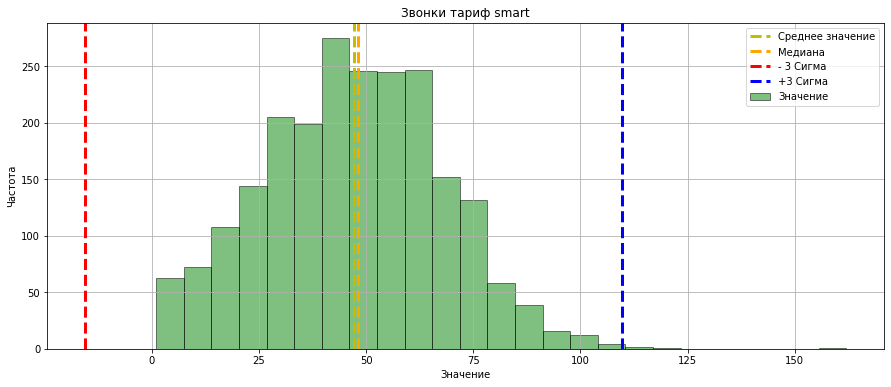

In [25]:
stat_report(sam_call_smart['count'], 'Звонки тариф smart')

Рассмотрим гистограмму. Распределение нормальное. Среднее значение и медиана почти одинаковы. Скошенности нет. Так же вычислии дисперсию и стандартное отклонение.

Среднее количество: 61.61
Медиана: 61.0
Дисперсия: 1167.67
Стандартное отклонение: 34.17


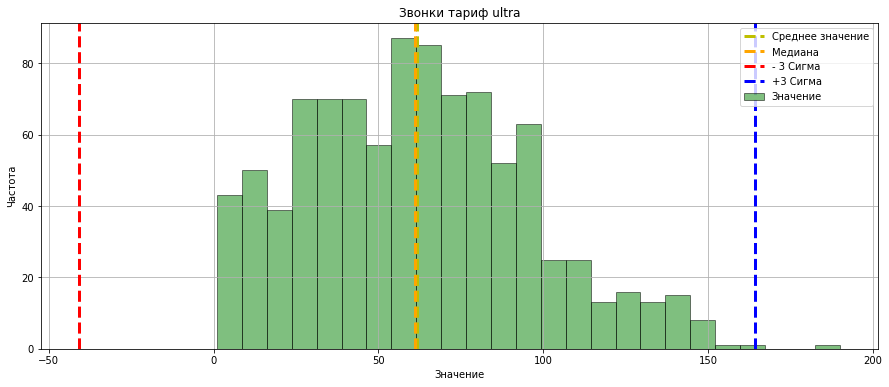

In [26]:
stat_report(sam_call_ultra['count'], 'Звонки тариф ultra')

Рассмотрим гистограмму. Распределение нормальное. Среднее значение и медиана почти одинаковы. Скошенности нет. Так же вычислии дисперсию и стандартное отклонение.

Среднее количество: 38.72
Медиана: 34.0
Дисперсия: 717.22
Стандартное отклонение: 26.78


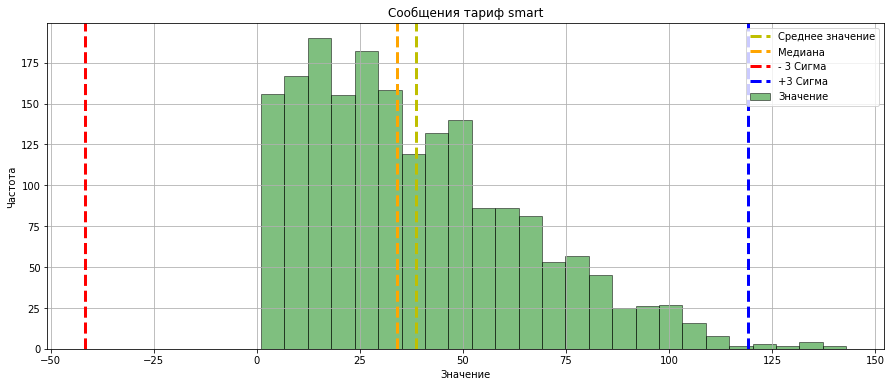

In [27]:
stat_report(sam_mess_smart['count'], 'Сообщения тариф smart')

Рассмотрим гистограмму. Распределение нормальное. Есть  небольшая скошенность в право. Так же вычислии дисперсию и стандартное отклонение.

Среднее количество: 61.16
Медиана: 51.0
Дисперсия: 2107.01
Стандартное отклонение: 45.9


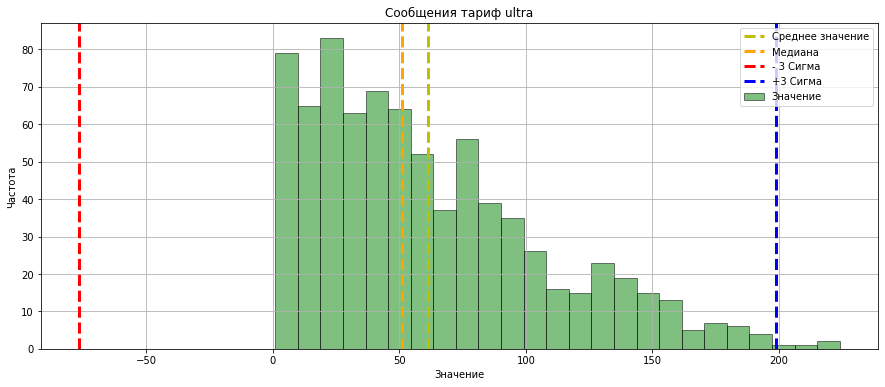

In [28]:
stat_report(sam_mess_ultra['count'], 'Сообщения тариф ultra')

Рассмотрим гистограмму. Распределение нормальное. Есть  небольшая скошенность в право. Так же вычислии дисперсию и стандартное отклонение.

Среднее количество: 19.25
Медиана: 18.97
Дисперсия: 94.08
Стандартное отклонение: 9.7


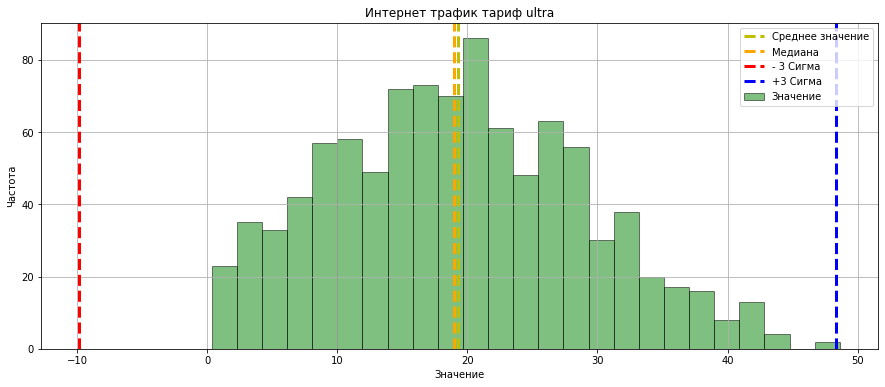

In [29]:
stat_report(sam_net_ultra['sum'], 'Интернет трафик тариф ultra')

Рассмотрим гистограмму. Распределение нормальное. Среднее значение и медиана почти одинаковы. Скошенности нет. Так же вычислии дисперсию и стандартное отклонение.

Среднее количество: 15.86
Медиана: 16.15
Дисперсия: 32.73
Стандартное отклонение: 5.72


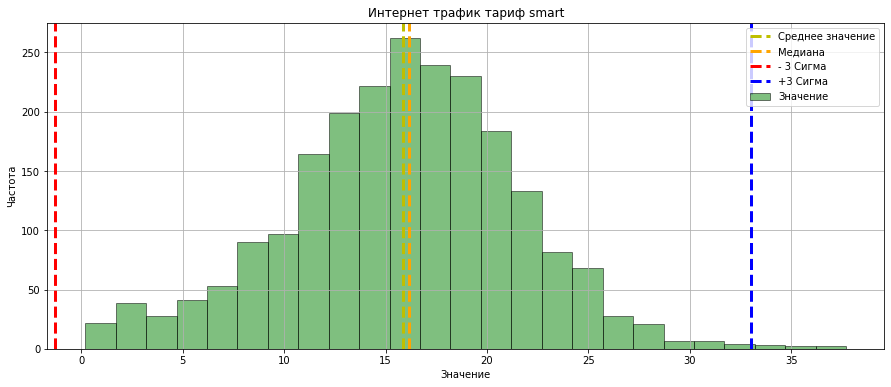

In [30]:
stat_report(sam_net_smart['sum'], 'Интернет трафик тариф smart')

Рассмотрим гистограмму. Распределение нормальное. Среднее значение и медиана почти одинаковы. Скошенности нет. Так же вычислии дисперсию и стандартное отклонение.

Найдем среднюю выручку, количество клиентов и сумму выручки клиентов тарифа smart и ultra.

In [31]:
revenue_user.head()

,user_id,date_month,sum_,count_c,revenue_call,count_m,revenue_mess,sumi,revenue_net,tariff_y,revenue_users
0,1000,5,159.00,17.00,0.00,22.00,0.00,"2,256.00",0.00,ultra,"1,950.00"
1,1000,6,172.00,28.00,0.00,60.00,0.00,"23,257.00",0.00,ultra,"1,950.00"
2,1000,7,340.00,41.00,0.00,75.00,0.00,"14,016.00",0.00,ultra,"1,950.00"
3,1000,8,408.00,42.00,0.00,81.00,0.00,"14,070.00",0.00,ultra,"1,950.00"
4,1000,9,466.00,46.00,0.00,57.00,0.00,"14,581.00",0.00,ultra,"1,950.00"


In [32]:
df1 = revenue_user.groupby('tariff_y').agg({'revenue_users':['mean', 'count', 'sum']}).reset_index()
df1

tariff_y revenue_users                   
                    mean count          sum
0    smart      1,231.92  2229 2,745,951.00
1    ultra      2,060.10   985 2,029,200.00

Мы видим что пользователи тарифа ultra тратят в месяц почти в два раза больше. Так же видим что количество клиентов тарифа ultra болше чем в 2 раза меньше количества клиентов тарифа smart. На первый взгляд нужно привлекать клиентов тарифа ultra, но посмотрим сколько в среднем приносит компании одна минута, одно сообщение и один Гб в каждом тарифе.

In [33]:
df2 = revenue_user.copy()
df2.rename(columns={'tariff_y': 'tariff'}, inplace=True)
df3 = pd.merge(df2, df_t, on='tariff', how='outer')
df4 = df3.groupby('tariff',).agg({'revenue_users':['mean', 'count', 'sum'], 'minutes_included': 'mean', 'messages_included': 'mean', 'mb_per_month_included': 'mean'}).reset_index()

In [34]:
df4['one_min_call'] = df4['revenue_users', 'mean'] / df4['minutes_included', 'mean']
df4['one_mess'] = df4['revenue_users', 'mean'] / df4['messages_included', 'mean']
df4['one_gb'] = df4['revenue_users', 'mean'] / (df4['mb_per_month_included', 'mean'] /1024)

In [35]:
df4

tariff revenue_users                    minutes_included messages_included  \
                  mean count          sum             mean              mean   
0  smart      1,231.92  2229 2,745,951.00           500.00             50.00   
1  ultra      2,060.10   985 2,029,200.00         3,000.00          1,000.00   

  mb_per_month_included one_min_call one_mess one_gb  
                   mean                               
0             15,360.00         2.46    24.64  82.13  
1             30,720.00         0.69     2.06  68.67

Из таблицы видим что каждая минута, каждое сообщение и каждый гигабайт по  тарифу smart в среднем в месяц приносит больше выручки.

## 3.1 Вывод

Нормальное распределние выборок свидетельствет об их репрезентативности. Средний клиент тарифа smart потребляет - 58 минут, 38 сообщений, 15 гб интернет трафика. Средний клиент тарифа ultra потребляет - 76 минут, 61 сообщений, 19 гб интернет трафика. Подтвердим или опровергнем гипотезы из задания. Хотя клиенты тарифа smart пользуються меньшим количеством минут сообщей и гб. Каждая минута сообщение и гб по этому тарифу приносит больше выручки, чем в тарифе ultra. Вывод нужно вкладывать деньги в рекламу тарифа smart.

## Шаг 4. Проверьте гипотезы

Подтвердим гипотезы
средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


In [36]:
sample_01 = revenue_user.query('tariff_y == "smart"')
sample_02 = revenue_user.query('tariff_y == "ultra"')
sample_1 = sample_01.loc[:,['revenue_users']]
sample_2 = sample_02.loc[:,['revenue_users']]

Применим Т-тест для подтверждения гипотезы о равенстве средних двух генеральных совокупностей. Проверим гипотезы - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Нулевая гипотеза будет звучать как sample_01 (средняя выручка  по тарифу smart) = sample_02 (среднее значеней выручке по тарифу ultra), альтернативная гипотеза sample_01 != sample_02. Зададим p-value = 0.05.

In [37]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [5.5279142e-191]
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем. Средние значения не равны. Переходим к подтверждению следующей гипотезы - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Нулевая гипотеза будет звучать как sample_03 (средняя выручка  в Москве) = sample_02 (среднее значеней выручке по Другим регионам), альтернативная гипотеза sample_03 != sample_04. Зададим p-value = 0.05.

In [38]:
df_u

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [39]:
df_u_city = df_u[['user_id', 'city']]
df_u_city

,user_id,city
0,1000,Краснодар
1,1001,Москва
2,1002,Стерлитамак
3,1003,Москва
4,1004,Новокузнецк
...,...,...
495,1495,Иркутск
496,1496,Вологда
497,1497,Челябинск
498,1498,Владикавказ


Подготовим необходимую выборку.

In [40]:
revenue_user_city = pd.merge(revenue_user, df_u_city, how='outer', on=['user_id'], 
         left_index=False, right_index=False, sort=True)
revenue_user_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3216 non-null   int64  
 1   date_month     3214 non-null   float64
 2   sum_           3214 non-null   float64
 3   count_c        3214 non-null   float64
 4   revenue_call   3214 non-null   float64
 5   count_m        3214 non-null   float64
 6   revenue_mess   3214 non-null   float64
 7   sumi           3214 non-null   float64
 8   revenue_net    3214 non-null   float64
 9   tariff_y       3214 non-null   object 
 10  revenue_users  3214 non-null   float64
 11  city           3216 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 326.6+ KB


Удалим пропуски их слишком мало.

In [41]:
revenue_user_mos = revenue_user_city.query('city == "Москва"')
revenue_user_not_mos = revenue_user_city.query('city != "Москва"')
sample_3 = revenue_user_not_mos.loc[:,['revenue_users']]
sample_4 = revenue_user_mos.loc[:,['revenue_users']]
sample_3 = sample_3.dropna()
sample_4 = sample_4.dropna()

Применим Т-тест для подтверждения гипотезы о равенстве средних двух генеральных совокупностей.

In [42]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_3, sample_4)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [0.50044412]
Не получилось отвергнуть нулевую гипотезу


Среднея выручка по Москве равна средней выручке по другим регионам.

## 4.1 Вывод
Проверив гипотезы можно сделать вывод что. Среднее значение выручки в тарифах smart и ultra не равны. Среднея выручка по Москве равна средней выручке по другим регионам.

## Шаг 5. Общий вывод

Мы проведи большую работу. Сгруппировали данные из пяти таблиц и соединили их в одну. Преобразовали типы данных некоторых столбцов и исключили появившиеся пропуски. Определили выручку по каждому клиенту помесячно. Мы подтвердили гипотезу что Среднея выручка по Москве равна средней выручке по другим регионам, так же подтвердили алтернативную гипотезу, что среднее выручки по тарифам не равны. Вычислив среднюю выручку за каждую минуту, сообщение и Гб в каждом тирифе, можно сделать вывод, что больше денег приности тариф Smart, так же можно отметить что выручка не зависит о региона страны.